In [3]:
import numpy as np
import scipy.constants as const
import matplotlib.pyplot as plt

from scipy.interpolate import CubicSpline

from laser_tools import pulse, goggles

In [6]:
spectrum_data = np.loadtxt("/Users/mattbain/OneDrive - SLAC National Accelerator Laboratory/Laser Safety/Heinz_Lab/SOP_2025/ASC_400_uJ_Carbide_MPC_static.csv", delimiter=",")

spectrum_wavelengths = spectrum_data[:,0]
spectrum_intensities = spectrum_data[:,1]

mypulse = pulse.from_spectrum(spectrum_wavelengths, spectrum_intensities, 8192, 1E-16)

print("Here ", mypulse.energy)

Energy here freq pre xform =  0.00035309569722220336
forward
Energy here time =  0.00034851646935133904
Energy here freq post xform =  0.00035309569722220336
Here  0.00035309569722220336


In [7]:
print("Energy = ", np.trapezoid(spectrum_intensities, x = spectrum_wavelengths))

spectrum_frequency = np.flip(np.divide(const.c, spectrum_wavelengths))
intensities = np.flip(spectrum_intensities)
intensities = intensities * (np.divide(const.c, np.power(spectrum_frequency, 2)))

print("Energy = ", np.trapezoid(intensities, x = spectrum_frequency))

Energy =  0.00035308102203959155
Energy =  0.000353079791269098


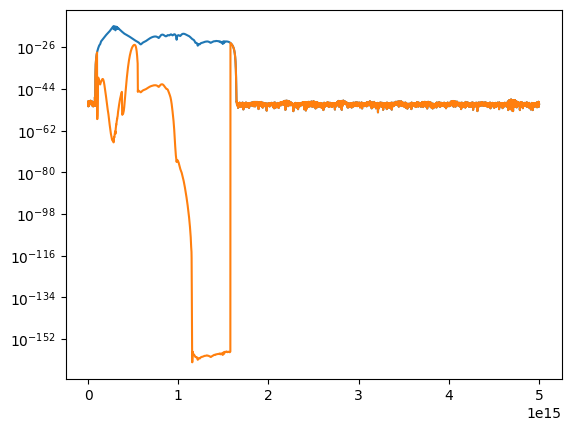

In [10]:
C1033 = goggles.C1033()

attenuated_pulse = C1033.attenuate_pulse(mypulse)

plt.plot(mypulse.frequency_axis, mypulse.If)
plt.plot(attenuated_pulse.frequency_axis, attenuated_pulse.If)
plt.yscale('log')
plt.show()